# Transforming Text into Features for Sentiment Analysis 

In this demo, you will see how to create a classifier that performs sentiment analysis of a book review. 
You will learn how to use scikit-learn to convert raw text data (such as a book review) into a matrix of <i>term frequency-inverse document frequency</i> (TF-IDF) features, and how to train a logistic regression model using these transformed features. You will also experiment with using different document-frequency values and see how they affect the performance of a logistic regression model.

### Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

We will also import the scikit-learn `LogisticRegression`, the `train_test_split()` function for splitting the data into training and test sets, and the function `roc_auc_score` to evaluate the model. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

## Step 1: Load a 'ready-to-fit' Data Set

We will work with a data set containing book reviews taken from Amazon.com reviews.

In [3]:
filename = os.path.join(os.getcwd(), "data", "bookReviews.csv")
df = pd.read_csv(filename, header=0)

In [4]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Step 2: Create Training and Test Data Sets

### Create Labeled Examples

Let's create labeled examples from our dataset. We will have one text feature and one label. 
The code cell below carries out the following steps:

* Gets the `Positive_Review` column from DataFrame `df` and assign it to the variable `y`. This will be our label. Note that the label contains True or False values that indicate whether a given book review is a positive one.
* Gets the column `Review` from DataFrame `df` and assigns it to the variable `X`. This will be our feature. Note that the `Review` feature contains the book review.


In [5]:
y = df['Positive Review'] 
X = df['Review']

X.shape

(1973,)

In [6]:
X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

Let's take a look at an example of a positive and a negative review.

In [7]:
print('A Positive Review: \n\n', X[67])
print('A Negative Review: \n\n', X[85])


A Positive Review: 

 I am not going to go over the contents of the book, or much about Charles Bukowski, because if you are considering this book you must know something about the man and his work. I will just give you my impression of this collection of work.
No collection can ever really be complete, there are always new things to add, new commentary, newly discovered works, transcripts of records and unpublished letters, but this book does an excellent job in its attempt.
To me Charles Bukowski will always be one of the greatest American writers of the twentieth century, because of the sheer brutality and honesty his work emanates. It is funny, sad, sadistic, cruel, scathing, enlightening and thought provoking. Everything I like to read. This is poetry for people who are disgusted by verse of flowers, trees and Greek mythology. This is RAW human emotion and experience smeared out onto paper. It is not perfect, and it is not trying to be. It doesn't always work, but there in lies th

### Split Labeled Examples into Training and Test Sets

Let's split our data into training and test sets with 75% of the data being the training set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=1234)

X_train.head()

500     There is a reason this book has sold over 180,...
1047    There is one thing that every cookbook author ...
1667    Being an engineer in the aerospace industry I ...
1646    I have no idea how this book has received the ...
284     It is almost like dream comes true when I saw ...
Name: Review, dtype: object

## Step 3:  Implement TF-IDF Vectorizer to Transform Text

A popular technique when transforming text to numerical feature vectors is to use the TF-IDF statistical measure. TF-IDF calculates how relevant a word is in a document relative to a collection of documents. It weighs words to indicate the words that are the most unique to the document and therefore can be used to represent the characteristics of the document. For example, the word "the" appears in many documents and therefore is not characteristic of one particular document in a collection. On the other hand, if a word appears often in one document and rarely in other documents in the collection, the word is given a higher value of importance to that one document. 
Because TF-IDF provides an understanding of the context of the textual data, using TF-IDF features when performing classification for sentiment analysis yields more accurate results.

Let's look at a simple example. We will use the scikit-learn `TfidfVectorizer` class to implement a TF-IDF vectorizer. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). First, let's import `TfidfVectorizer`.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

Let's consider the values in the TF-IDF matrix that `TfidfVectorizer` produces:

* <b>Row</b>: each document will be represented by a numerical vector (row) in the matrix. 
* <b>Column</b>: each column represents one word in the vocabulary, i.e. the number of words in ALL of the documents in the collection (with the exclusion of words that appear too frequently or too infrequently; scikit-learn has a list of such words to ignore by default, but you will see later that you can specify frequency thresholds to eliminate words that appear too often/little). 
    * The value in the columns are the TF-IDF scores (weights) for the word in every document in the collection (one document per row).

The code cell below transforms two "documents." Run the cell below to see what the code produces. 

Vocabulary size 7: {'my': 5, 'cat': 1, 'loves': 4, 'yarn': 6, 'blue': 0, 'have': 3, 'dog': 2}

Matrix:

[[0.25969799 0.36499647 0.         0.         0.36499647 0.36499647
  0.72999294]
 [0.44943642 0.         0.6316672  0.6316672  0.         0.
  0.        ]]

Heatmap of Matrix:



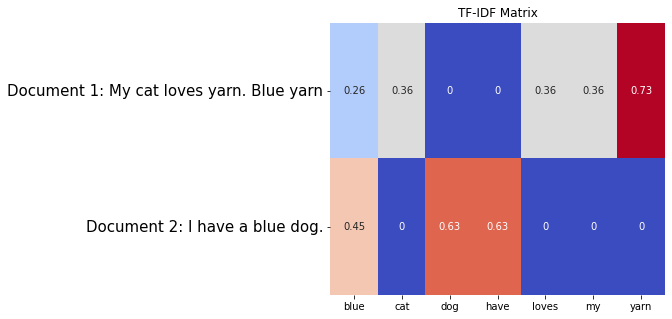

In [10]:
document_collection = [
    'My cat loves yarn. Blue yarn.',
    'I have a blue dog.'
]

# 1. Create a TfidfVectorizer oject
vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to document_collection
vectorizer.fit(document_collection)

# 3. Print the vocabulary
print("Vocabulary size {0}: {1}\n".format(len(vectorizer.vocabulary_), vectorizer.vocabulary_))

# 4. Transform the data into numerical vectors 
print("Matrix:\n")
resulting_matrix = vectorizer.transform(document_collection)

# 5. Print the matrix
print(resulting_matrix.todense())

# 6. Visualize the matrix in a heatmap
print("\nHeatmap of Matrix:\n")
df_print = pd.DataFrame(resulting_matrix.toarray(), columns=vectorizer.get_feature_names())
plt.rcParams['figure.figsize'] = [6, 5]  
ax = sns.heatmap(df_print, annot=True, cmap='coolwarm', cbar=False, yticklabels=["Document 1: My cat loves yarn. Blue yarn", "Document 2: I have a blue dog."]);
_ =ax.set_title('TF-IDF Matrix');
_ =ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 15)

Let's summarize the resulting matrix above:

<table>
    <tr><th></th><th>blue</th><th>cat</th><th>dog</th><th>have</th><th>loves</th><th>my</th><th>yarn</th></tr>
<tr><th>Document 1</th><th>0.25969799</th><th>0.36499647</th><th>0.</th><th>0.</th><th>0.36499647</th><th>0.36499647</th><th>0.72999294</th><t/tr>
<tr><th>Document 2</th><th>0.44943642</th><th>0.</th><th>0.6316672</th><th>0.6316672</th><th>0.</th><th>0.</th><th>0.</th></tr>   
    </table>




We have 7 words in our vocabulary: 'blue', 'cat', dog', 'have', 'loves', 'my, 'yarn'. Note that scikit-learn excluded the words 'I' and 'a'. Therefore, we have 7 columns. Note that each word is considered a feature. Therefore, in this example, we have seven features.

The `vectorizer.vocabulary_` attribute outputs a mapping of words to column indices: {'my': 5, 'cat': 1, 'loves': 4, 'yarn': 6, 'blue': 0, 'have': 3, 'dog': 2}. This means that the TF-IDF score (weight) for the word 'my' is contained is in the 5th column (the first column is 0) in the matrix.

The table above summarizes the results of the code. Note that in our first document, the word 'dog' does not appear. Therefore, its value in the document's vector is 0. Since the word 'blue' appears in both documents, its importance is not as high for either document. Therefore, its value in both document vectors is not very high compared to other values. However, since 'dog' appears in the second document only, it has a higher importance since it is characteristic of the second document; its value in that document's vector is 0.6316672. 


Let's now transform our book review textual features into numerical vectors using `TfidfVectorizer`. We will implement a TF-IDF transformation on the training and test data. Run the cell and inspect the results.

In [11]:
# 1. Create a TfidfVectorizer oject
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Print the first 50 items in the vocabulary
print("Vocabulary size {0}: ".format(len(tfidf_vectorizer.vocabulary_)))
print(str(list(tfidf_vectorizer.vocabulary_.items())[0:50])+'\n')

      
# 4. Transform *both* the training and test data using the fitted vectorizer and its 'transform' attribute
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# 5. Print the matrix
print(X_train_tfidf.todense())

Vocabulary size 18558: 
[('there', 16673), ('is', 9043), ('reason', 13533), ('this', 16714), ('book', 2189), ('has', 7803), ('sold', 15423), ('over', 11793), ('180', 73), ('000', 1), ('copies', 3867), ('it', 9076), ('gets', 7240), ('right', 14207), ('to', 16835), ('the', 16627), ('point', 12568), ('accompanies', 444), ('each', 5372), ('strategy', 15943), ('with', 18277), ('visual', 17844), ('aid', 750), ('so', 15386), ('you', 18497), ('can', 2604), ('get', 7239), ('mental', 10534), ('picture', 12402), ('in', 8491), ('your', 18501), ('head', 7844), ('further', 7051), ('its', 9088), ('section', 14743), ('on', 11601), ('analyzing', 974), ('stocks', 15886), ('and', 984), ('commentary', 3384), ('state', 15782), ('of', 11543), ('financial', 6568), ('statements', 15786), ('market', 10286), ('are', 1220), ('money', 10863), ('if', 8336), ('just', 9282), ('starting', 15774)]

[[0.         0.16185315 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.       

## Step 4: Fit a Logistic Regression Model to the Transformed Training Data and Evaluate the Model
The code cell below trains a logistic regression model using the TF-IDF features and computes the AUC on the test set.

In [12]:
# 1. Create a LogisticRegression model object, and fit a Logistic Regression model to the transformed training data
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# 2. Make predictions on the transformed test data using the predict_proba() method and 
# save the values of the second column
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

# 3. Make predictions on the transformed test data using the predict() method 
class_label_predictions = model.predict(X_test_tfidf)

# 4. Compute the Area Under the ROC curve (AUC) for the test data. Note that this time we are using one 
# function 'roc_auc_score()' to compute the auc rather than using both 'roc_curve()' and 'auc()' as we have 
# done in the past
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

# 5. Print out the size of the resulting feature space using the 'vocabulary_' attribute of the vectorizer
len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

# 6. Get a glimpse of the features:
first_five = list(tfidf_vectorizer.vocabulary_.items())[1:5]
print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))


AUC on the test data: 0.9146
The size of the feature space: 18558
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('is', 9043), ('reason', 13533), ('this', 16714), ('book', 2189)]:


Let's check two book reviews and see if our model properly predicted whether the reviews are good or bad reviews.

In [13]:
print('Review #1:\n')
print(X_test.to_numpy()[124])

print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions[124])) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[124]))

Review #1:

I've been a fan of Carol Dweck's scholarly work for years. Her work on self-esteem, self-concept, and the incremental vs. entity theories of intelligence provides some of the most powerfully useful tools I've encountered for educators and parents in their work with children, as well as in their own self-awareness and lives. I'm delighted to see this information written here in such a user-friendly conversational tone, rich with stories that illustrate the nuances and complexities of Dweck's research and ideas. I'm recommending this book to all of my graduate students (teachers and principals working with gifted learners), as well as to parents of high-ability children.

Dona Matthews, Ph.D., Director of the Hunter College Center for Gifted Studies and Education, City University of New York


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [14]:
print('Review #2:\n')
print(X_test.to_numpy()[238])

print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions[238])) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[238]))

Review #2:

I have read other books by Alesia Holliday and enjoyed them so I looked forward to reading this book.  Unfortunately, I could not get any farther than the first 25 pages.  I even tried diving in further into the book to see if it got better and I still could not read more than 5 pages without turning away.  The best I can do to pin down why I dislike it so much is to say that it tries too hard.  No character seems to even approach reality.  They are all, including the main character and her love interest, over the top


Prediction: Is this a good review? False

Actual: Is this a good review? False



## Step 5: Experiment with Different Document Frequency Values and Analyze the Results

When creating a `TfidfVectorizer` object, you can use the parameter `min_df` to specify the minimum 'document frequency.' This allows you to ignore words that have a document frequency lower than the specified value. In other words, they ignore words that occur in too few documents.

The code cell below puts the code above into a loop over a range of 'document frequency' values. For each value, it fits a vectorizer specifying `ngram_range=(1,2)` (instead of the default (1,1)). Run the code and inspect the results. 

Note: This may take a short while to run.

In [15]:
for min_df in [1,10,100,1000]:
    
    print('\nMin Document Frequency Value: {0}'.format(min_df))
    
    # 1. Create a TfidfVectorizer oject
    tfidf_vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=(1,2))

    # 2. Fit the vectorizer to X_train
    tfidf_vectorizer.fit(X_train)

    # 3. Transform the training and test data
    X_train_tfidf = tfidf_vectorizer.transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # 4. Create a LogisticRegression model object, and fit a Logistic Regression model to the transformed 
    # training data
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_tfidf, y_train)
    
    # 5. Make predictions on the transformed test data using the predict_proba() method and save 
    # the values of the second column
    probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

    # 6. Compute the Area Under the ROC curve (AUC) for the test data.
    auc = roc_auc_score(y_test, probability_predictions)
    print('AUC on the test data: {:.4f}'.format(auc))

    # 7. Compute the size of the resulting feature space using the 'vocabulary_' attribute of the vectorizer
    len_feature_space = len(tfidf_vectorizer.vocabulary_)
    print('The size of the feature space: {0}'.format(len_feature_space))
    
    # 8. Get a glimpse of the features:
    first_five = list(tfidf_vectorizer.vocabulary_.items())[1:5]
    print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

    # 9: Print the first five "stop words" - words that we are ignoring
    first_five_stop = list(tfidf_vectorizer.stop_words_)[1:5]
    print('Glimpse of first 5 stop words \n{}:'.format(first_five_stop))
    


Min Document Frequency Value: 1
AUC on the test data: 0.9268
The size of the feature space: 138486
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('is', 61671), ('reason', 97323), ('this', 120815), ('book', 18054)]:
Glimpse of first 5 stop words 
[]:

Min Document Frequency Value: 10
AUC on the test data: 0.9195
The size of the feature space: 4023
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('is', 1687), ('reason', 2699), ('this', 3396), ('book', 464)]:
Glimpse of first 5 stop words 
['counted as', 'delivery and', 'low 80s', 'case histories']:

Min Document Frequency Value: 100
AUC on the test data: 0.8463
The size of the feature space: 257
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('is', 102), ('this', 207), ('book', 35), ('has', 81)]:
Glimpse of first 5 stop words 
['counted as', 'delivery and', 'low 80s', 'case histories']:

Min Document Frequency Value: 1000
AUC on the 

<b>Analysis:</b> Just as you can use the parameter `min_df` to specify the minimum 'document frequency,' you can use the parameter `max_df` to ignore words that have a document frequency higher than the specified value. Try using the parameter `max_def` and compare the results.